In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


In [6]:
data = pd.read_csv('/content/drive/My Drive/X-Ray Images/train.csv')
data.head


<bound method NDFrame.head of          Image Index Finding Labels  ...  Atelectasis  Pneumonia
0   00000001_000.png              1  ...            0          0
1   00000001_001.png            1|2  ...            0          0
2   00000001_002.png            1|3  ...            0          0
3   00000002_000.png              4  ...            0          0
4   00000003_000.png              5  ...            0          0
..               ...            ...  ...          ...        ...
95  00000020_002.png        11|6|10  ...            0          0
96  00000021_000.png              8  ...            0          0
97  00000021_001.png              6  ...            0          0
98  00000022_000.png              4  ...            0          0
99  00000022_001.png             11  ...            0          0

[100 rows x 15 columns]>

In [7]:
data.columns

Index(['Image Index', 'Finding Labels', 'Cardiomegaly', 'Emphysema',
       'Effusion', 'No Finding', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pneumothorax', 'Pleural_Thickening', 'Fibrosis', 'Atelectasis',
       'Pneumonia'],
      dtype='object')

In [8]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img('/content/drive/My Drive/X-Ray Images/'+data['Image Index'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 100/100 [00:21<00:00,  5.03it/s]


In [9]:
X.shape

(100, 400, 400, 3)

In [10]:
y = np.array(data.drop(['Image Index','Finding Labels'],axis=1))
y.shape
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [14]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
history = model.fit(X_train,
                       y_train,
                       epochs=100,
                       validation_data=(X_test, y_test),
                       batch_size=16)




Train on 90 samples, validate on 10 samples
Epoch 1/100





90/90 [==============================] - 17s 188ms/step - loss: 0.7095 - acc: 0.6479 - val_loss: 0.6705 - val_acc: 0.8462
Epoch 2/100
90/90 [==============================] - 0s 5ms/step - loss: 0.5897 - acc: 0.6897 - val_loss: 0.6461 - val_acc: 0.8923
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 0.5448 - acc: 0.7436 - val_loss: 0.5679 - val_acc: 0.8923
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 0.5168 - acc: 0.7701 - val_loss: 0.5809 - val_acc: 0.8923
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 0.5030 - acc: 0.7667 - val_loss: 0.5307 - val_acc: 0.8923
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 0.4806 - acc: 0.8077 - val_loss: 0.5329 - val_acc: 0.8923
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 0.4576 - acc: 0.8137 - val_loss: 0.5084 - val_acc: 0.8923
Epoch 8/100
90/90 [=========

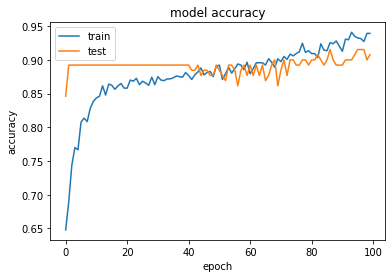

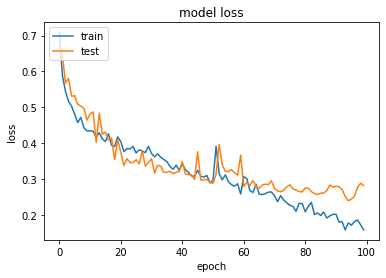

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

No Finding (0.815)
Infiltration (0.0645)
Pneumothorax (0.0233)


IndexError: ignored

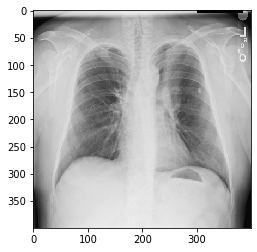

In [23]:
img = image.load_img('/content/drive/My Drive/test/00001089_000.png',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)
classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(4):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))


In [0]:

model.save_weights("/content/sample_data/analaticsModel.h5")